In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define base model (pre-trained VGG16 model)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Build model on top of VGG16
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [5]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/50
391/391 [==============================] - 9s 21ms/step - loss: 1.4065 - accuracy: 0.5133 - val_loss: 1.2778 - val_accuracy: 0.5539
Epoch 2/50
391/391 [==============================] - 8s 20ms/step - loss: 1.2050 - accuracy: 0.5809 - val_loss: 1.2203 - val_accuracy: 0.5757
Epoch 3/50
391/391 [==============================] - 8s 19ms/step - loss: 1.1452 - accuracy: 0.6013 - val_loss: 1.2113 - val_accuracy: 0.5745
Epoch 4/50
391/391 [==============================] - 8s 20ms/step - loss: 1.1039 - accuracy: 0.6158 - val_loss: 1.1588 - val_accuracy: 0.5959
Epoch 5/50
391/391 [==============================] - 8s 20ms/step - loss: 1.0722 - accuracy: 0.6274 - val_loss: 1.1528 - val_accuracy: 0.5953
Epoch 6/50
391/391 [==============================] - 8s 19ms/step - loss: 1.0427 - accuracy: 0.6367 - val_loss: 1.1253 - val_accuracy: 0.6076
Epoch 7/50
391/391 [==============================] - 8s 19ms/step - loss: 1.0133 - accuracy: 0.6459 - val_loss: 1.1176 - val_accuracy: 0.6090

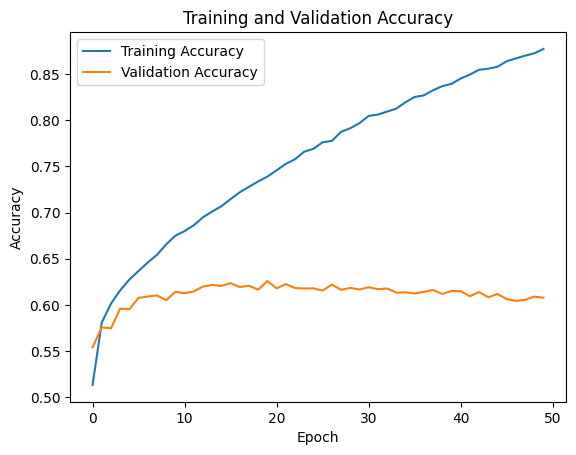

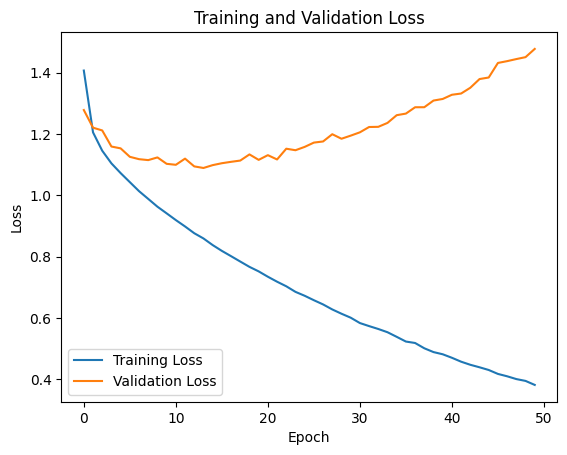

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()